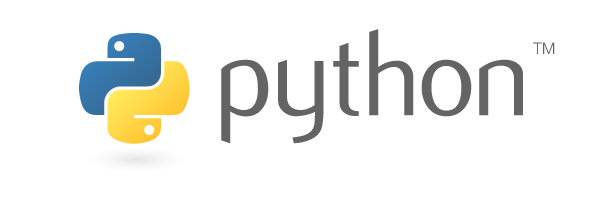

In [1]:
import numpy as np
import scipy.stats as st

In [2]:
alpha=0.05
data=range(1,100)

### Descriptive stats

In [4]:
st.gmean(data)#geometric mean

37.62310047409743

In [5]:
st.hmean(data)#harmonic mean

19.121649843516597

In [6]:
st.tmean(data, (20, 80))#trimed mean

50.0

In [7]:
st.trim_mean(data, 0.2)#trimed mean

50.0

In [8]:
st.mode(data)# mode

ModeResult(mode=array([1]), count=array([1]))

In [9]:
st.skew(data) #skewness

0.0

In [10]:
st.tmin(data, 5) #trimmed min

5

In [11]:
st.tmax(data, 50) #trimmed max

50

In [12]:
st.tvar(data, (10, 90)) #trimmed variance 

553.5

In [13]:
st.tvar(data, (10, 90)) #trimmed variance 

553.5

In [14]:
st.tsem(data, (10, 90)) #trimmed standard error 

2.614064523559687

In [15]:
st.variation(data) #coefficient of variation

0.5715476066494083

### Confidence interval

In [16]:
g=st.t.interval(alpha, len(data) - 1, loc=np.mean(data), scale=st.sem(data))

print([round(i) for i in g])

[50.0, 50.0]


# Hypothesis testing

### 1. Normality Tests

In [17]:
# Shapiro-Wilk Test
stat, p = st.shapiro(data)
stat, p

(0.9547305703163147, 0.0018385202856734395)

In [18]:
# Anderson-Darling Test
stat, p = st.normaltest(data)
stat, p

(34.173457336415495, 3.79601592424177e-08)

### 2. Correlation Tests

In [19]:
#Pearson’s Correlation Coefficient
data1, data2 = [i for i in range(20)], [i+2 for i in range(20)]
corr, p = st.pearsonr(data1, data2)
corr, p

(1.0, 0.0)

In [20]:
#Spearman’s Rank Correlation
corr, p = st.spearmanr(data1, data2)
corr, p

(1.0, 0.0)

In [21]:
#Kendall’s Rank Correlation
corr, p = st.kendalltau(data1, data2)
corr, p

(1.0, 8.22063524662433e-19)

In [22]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
stat, p, dof, expected = st.chi2_contingency(obs)
stat, p

(2.7777777777777777, 0.24935220877729622)

### 3. Parametric Statistical Hypothesis Tests

In [24]:
# Student’s t-test
#Tests whether the means of two independent samples are significantly different.

In [25]:
stat, p = st.ttest_ind(data1, data2)
stat, p

(-1.0690449676496976, 0.29179351473703763)

In [26]:
#Paired Student’s t-test
#Tests whether the means of two paired samples are significantly different.

In [27]:
stat, p = st.ttest_rel(data1, data2)
stat, p

(-inf, 0.0)

In [28]:
# Critical value 
#n=22,  2-tail
#stats.t.ppf(1-0.025, df)
# df=n-1=22-1=21
print (st.t.ppf(1-0.025, 21))

2.079613844727662


In [29]:
#ANOVA
#Tests whether the means of two or more independent samples are significantly different.

In [30]:
import statsmodels.api as sm

In [31]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()

In [32]:
st.f_oneway(df['Literacy'], df['Wealth'])

F_onewayResult(statistic=1.7895548160805828, pvalue=0.18278849027846125)

### 4. Nonparametric Statistical Hypothesis Tests

In [33]:
# Mann-Whitney U Test
# Tests whether the distributions of two independent samples are equal or not.

In [34]:
stat, p = st.mannwhitneyu(data1, data2)
stat, p

(162.0, 0.15499670953722972)

In [35]:
# Wilcoxon Signed-Rank Test
# Tests whether the distributions of two paired samples are equal or not.

In [36]:
stat, p = st.wilcoxon(data1, data2)
stat, p

(0.0, 7.74421643104407e-06)

In [37]:
# Kruskal-Wallis H Test

In [38]:
stat, p = st.kruskal(data1, data2)
stat, p

(1.0583724863747612, 0.30358667675104756)

In [39]:
# Friedman Test

In [40]:
a = np.array([[1, 2, 3], [2, 3, 4] ,[4, 5, 6]])
st.friedmanchisquare(*(a[i, :] for i in range(a.shape[0])))

FriedmanchisquareResult(statistic=6.0, pvalue=0.04978706836786395)

# Linear regression 

Linear regression is a statistical method of finding the relationship between independent and dependent variables.

In order to fit the best intercept line between the points in the above scatter plots, we use a metric called “Sum of Squared Errors” (SSE) and compare the lines to find out the best fit by reducing errors. The errors are sum difference between actual value and predicted value.

To find the errors for each dependent value, we need to use the formula below.



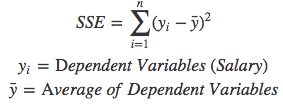

To do the best fit of line intercept, we need to apply a linear regression model to reduce the SSE value at minimum as possible. To identify a slope intercept, we use the equation

y = mx + b,

‘m’ is the slope

‘x’ → independent variables

‘b’ is intercept


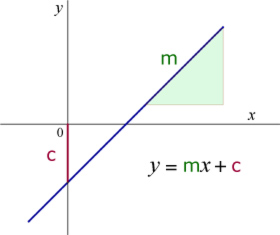

## Ordinary least squares [OLS]

This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.

To use OLS method, we apply the below formula to find the equation

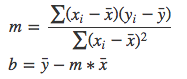

### The Seven Classical OLS Assumptions

#### OLS Assumption 1: The regression model is linear in the coefficients and the error term

A regression model is linear when all terms in the model are either the constant or a parameter multiplied by an independent variable. You build the model equation only by adding the terms together. T

#### OLS Assumption 2: The error term has a population mean of zero

The error term accounts for the variation in the dependent variable that the independent variables do not explain. Random chance should determine the values of the error term. For your model to be unbiased, the average value of the error term must equal zero.



#### OLS Assumption 3: All independent variables are uncorrelated with the error term
If an independent variable is correlated with the error term, we can use the independent variable to predict the error term, which violates the notion that the error term represents unpredictable random error. We need to find a way to incorporate that information into the regression model itself.

#### OLS Assumption 4: Observations of the error term are uncorrelated with each other
One observation of the error term should not predict the next observation.

#### OLS Assumption 5: The error term has a constant variance (no heteroscedasticity)
The variance of the errors should be consistent for all observations. In other words, the variance does not change for each observation or for a range of observations. This preferred condition is known as homoscedasticity (same scatter). 

#### OLS Assumption 6: No independent variable is a perfect linear function of other explanatory variables
Perfect correlation occurs when two variables have a Pearson’s correlation coefficient of +1 or -1. When one of the variables changes, the other variable also changes by a completely fixed proportion. The two variables move in unison.

Perfect correlation suggests that two variables are different forms of the same variable. For example, games won and games lost have a perfect negative correlation (-1). The temperature in Fahrenheit and Celsius have a perfect positive correlation (+1).

#### OLS Assumption 7: The error term is normally distributed (optional)
OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.

### LR  With statsmodels

In [41]:
# imports

In [42]:
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [55]:
x=df['Lottery']
y=df['Literacy']

In [56]:
model=smf.OLS(y, x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Literacy   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     88.96
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           8.02e-15
Time:                        17:22:30   Log-Likelihood:                -409.23
No. Observations:                  85   AIC:                             820.5
Df Residuals:                      84   BIC:                             822.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Lottery        0.6194      0.066      9.432      0.000       0.489       0.750
==============================================================================
Omnibus:                       11.414   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.670
Skew:                           0.090   Prob(JB):                        0.160
Kurtosis:                       1.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  LR with scipy

In [57]:
from scipy import stats

In [59]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [60]:
print 'Slope: {} \nInterspt: {}\nR^2: {} \nP: {} \nST_ERR: {}'. format(slope, intercept, r_value, p_value, std_err) 

Slope: -0.26899496317 
Interspt: 50.7174538268
R^2: -0.381733693741 
P: 0.000312361674918 
ST_ERR: 0.0714898804675


### LR with scikit learn

In [61]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
regr = linear_model.LinearRegression()
regr.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[-0.26899496]]


In [64]:
x=np.array(x)
y=np.array(y)
y_pred = regr.predict(x.reshape(-1, 1))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y.reshape(-1, 1), y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y.reshape(-1, 1), y_pred.reshape(-1, 1)))

Mean squared error: 256.61
Variance score: 0.15


# Logistic Regression

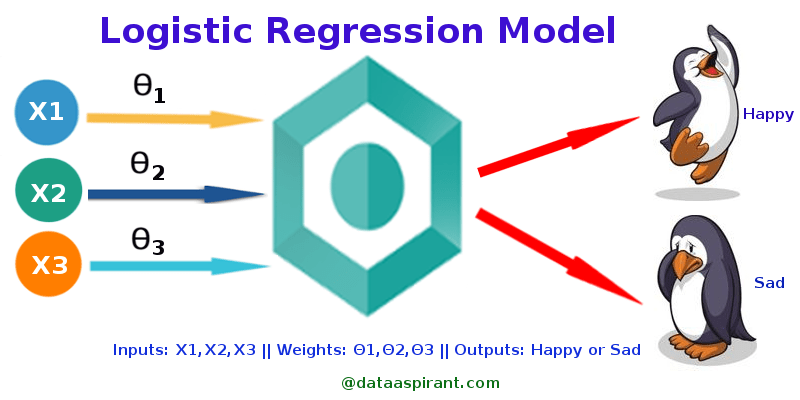

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  
Like all regression analyses, the logistic regression is a predictive analysis.  
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

### Binary logistic regression major assumptions:

* The dependent variable should be dichotomous in nature (e.g., presence vs. absent).
* There should be no outliers in the data, which can be assessed by converting the continuous predictors to standardized scores, and removing values below -3.29 or greater than 3.29.
* There should be no high correlations (multicollinearity) among the predictors.  This can be assessed by a correlation matrix among the predictors. Tabachnick and Fidell (2013) suggest that as long correlation coefficients among independent variables are less than 0.90 the assumption is met.

At the center of the logistic regression analysis is the task estimating the log odds of an event.  Mathematically, logistic regression estimates a multiple linear regression function defined as:

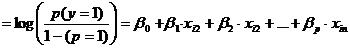

**Overfitting.**  When selecting the model for the logistic regression analysis, another important consideration is the model fit.  Adding independent variables to a logistic regression model will always increase the amount of variance explained in the log odds (typically expressed as R²).  However, adding more and more variables to the model can result in overfitting, which reduces the generalizability of the model beyond the data on which the model is fit.

**Reporting the R2.**  Numerous pseudo-R2 values have been developed for binary logistic regression.  These should be interpreted with extreme caution as they have many computational issues which cause them to be artificially high or low.  A better approach is to present any of the goodness of fit tests available; Hosmer-Lemeshow is a commonly used measure of goodness of fit based on the Chi-square test.

In [65]:
import pandas as pd

In [66]:
data = pd.read_csv("ex2data1.txt", 
                   header=None, 
                   names=['Exam1', 'Exam2', 'Admitted'])

In [67]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### LOG R with statsmodels

In [68]:
X = data.copy() # ou training data
y = X.Admitted.copy() # copy “y” column values out
X.drop(['Admitted'], axis=1, inplace=True) # then, drop y column
X['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

In [69]:
model = sm.Logit(y, X)

In [70]:
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Mar 2019   Pseudo R-squ.:                  0.6976
Time:                        17:24:18   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 4.067e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Exam1          0.2062      0.048      4.296      0.000       0.112       0.300
Exam2          0.2015      0.049      4.143      0.000       0.106       0.297
intercept    -25.1613      5.799     -4.339      0.000     -36.526     -13.796
==============================================================================
"""

In [71]:
result.conf_int()

,0,1
Exam1,0.112152,0.300311
Exam2,0.106168,0.296775
intercept,-36.526287,-13.796380


In [72]:
#### Plot the decision boundary¶

In [73]:
import matplotlib.pyplot as plt

In [74]:
plot_x = np.array([ 95.60854757,  21.63578984])
coefficients = result.params
line_intercept = -coefficients['intercept'] / coefficients['Exam2']
line_slope = -coefficients['Exam1'] / coefficients['Exam2']

In [75]:
colours = ['red' if i==0 else 'green' for i in y] # red not admitted, green yes.

In [76]:
plot_y = [line_slope * i + line_intercept for i in plot_x]
plot_y

[27.020279700896708, 102.7407709774485]

Text(0.5,0.98,'Student admission vs. past two exams')

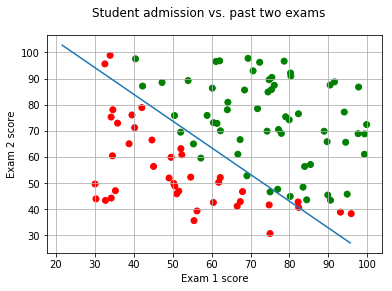

In [77]:
fig,ax = plt.subplots()
ax.scatter(X.Exam1, X.Exam2, c=colours)
ax.plot(plot_x, plot_y)
ax.grid(True)
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
fig.suptitle("Student admission vs. past two exams")

### LOG R with scikit learn 

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(X, y)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
model.score(X, y)

0.91

In [82]:
model.intercept_ # the fitted intercept

array([-2.85831439])

# ARIMA

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

In [83]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [84]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', 
                   parse_dates=['Month'], 
                   index_col='Month',
                   date_parser=dateparse)

In [85]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 1. Check Stationarity of a Time Series

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

/home/anastasiya/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


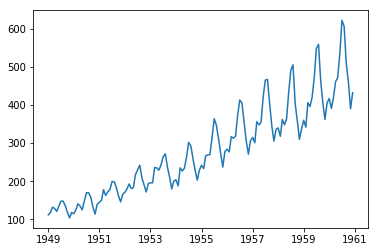

In [86]:
plt.plot(data)

So, more formally, we can check stationarity using the following:

* Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.



* Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

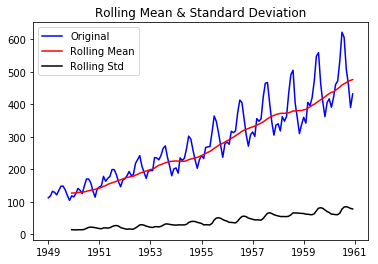

In [87]:
#Determing rolling statistics
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [88]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(data['#Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.



#### Estimating & Eliminating Trend

There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model


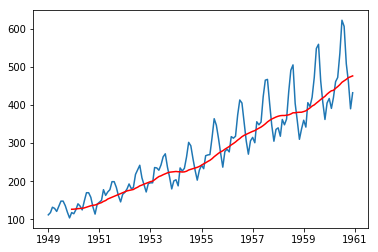

In [89]:
moving_avg = data.rolling(window=12).mean()
plt.plot(data)
plt.plot(moving_avg, color='red')

In [90]:
ts_log_moving_avg_diff = data - moving_avg
ts_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [91]:
ts_log_moving_avg_diff.dropna(inplace=True)

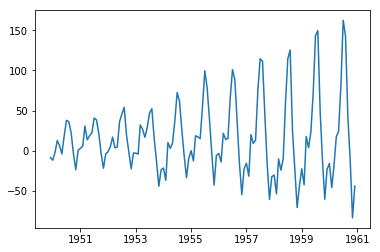

In [95]:
plt.plot(ts_log_moving_avg_diff)

In [96]:
#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(ts_log_moving_avg_diff['#Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


### Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

* Differencing – taking the differece with a particular time lag
* Decomposition – modeling both trend and seasonality and removing them from the model.

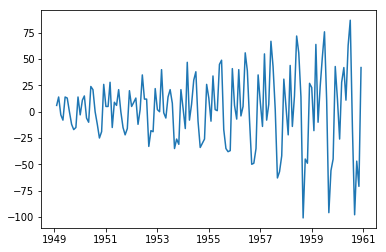

In [100]:
# Differencing
ts_log_diff = data - data.shift()
plt.plot(ts_log_diff)

In [98]:
data.shift()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
1949-06-01,121.0
1949-07-01,135.0
1949-08-01,148.0
1949-09-01,148.0


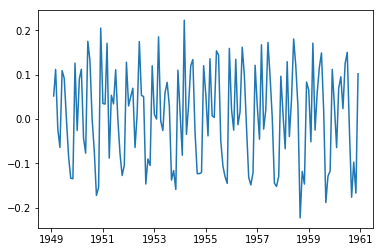

In [101]:
ts_log = np.log(data)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [102]:
# Decomposing

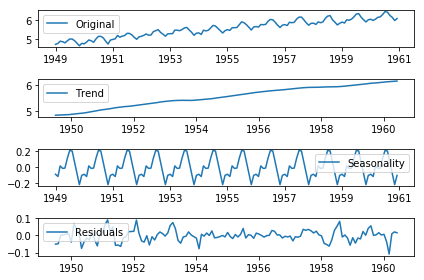

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

The predictors depend on the parameters (p,d,q) of the ARIMA model:

* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).



* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.



* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [104]:
# Partial Autocorrelation Function (PACF): 
# Will be used to find p

In [105]:
from statsmodels.graphics.tsaplots import plot_pacf 

In [106]:
ts_log_diff=ts_log_diff[1:]

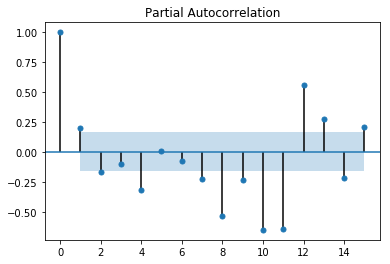

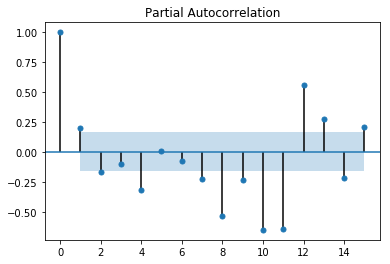

In [107]:
#Plot ACF: 
plot_pacf(ts_log_diff, lags=15)

In [108]:
from statsmodels.tsa.arima_model import ARIMA

/home/anastasiya/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anastasiya/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


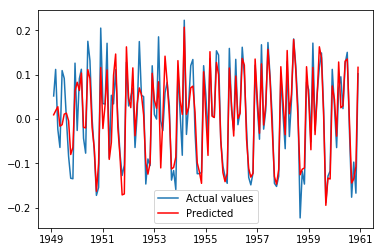

In [109]:
model = ARIMA(ts_log_diff, order=(14, 0, 0))  
results_AR = model.fit()  

plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.legend(['Actual values', 'Predicted'])

In [110]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  143
Model:                    ARMA(14, 0)   Log Likelihood                 253.413
Method:                       css-mle   S.D. of innovations              0.038
Date:                Sat, 09 Mar 2019   AIC                           -474.826
Time:                        17:46:36   BIC                           -427.421
Sample:                    02-01-1949   HQIC                          -455.563
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0097      0.001      7.481      0.000       0.007       0.012
ar.L1.#Passengers     -0.3648      0.084     -4.320      0.000      -0.530      -0.199
ar.L2.#Passengers     -0.1517      0.088     -1.719      0.088      -0.325       0.021
ar.L3.#Passengers     -0.1778      0.069     -2.563      0.012      -0.314      -0.042
ar.L4.#Passengers     -0.2604      0.071     -3.660      0.000      -0.400      -0.121
ar.L5.#Passengers     -0.1395      0.071     -1.957      0.053      -0.279       0.000
ar.L6.#Passengers     -0.2227      0.070     -3.191      0.002      -0.359      -0.086
ar.L7.#Passengers     -0.1910      0.068     -2.789      0.006      -0.325      -0.057
ar.L8.#Passengers     -0.2895      0.069     -4.201      0.000      -0.425      -0.154
ar.L9.#Passengers     -0.1381      0.071     -1.954      0.053      -0.277       0.000
ar.L10.#Passengers    -0.2494      0.071     -3.508      0.001      -0.389      -0.110
ar.L11.#Passengers    -0.1273      0.070     -1.811      0.072      -0.265       0.010
ar.L12.#Passengers     0.6398      0.070      9.130      0.000       0.502       0.777
ar.L13.#Passengers     0.2512      0.090      2.802      0.006       0.076       0.427
ar.L14.#Passengers    -0.1117      0.087     -1.286      0.201      -0.282       0.059
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.5006           -0.8743j            1.0075           -0.3328
AR.2            -0.5006           +0.8743j            1.0075            0.3328
AR.3            -0.8891           -0.5194j            1.0297           -0.4158
AR.4            -0.8891           +0.5194j            1.0297            0.4158
AR.5            -1.2359           -0.0000j            1.2359           -0.5000
AR.6            -1.4156           -0.0000j            1.4156           -0.5000
AR.7             0.0133           -1.0114j            1.0115           -0.2479
AR.8             0.0133           +1.0114j            1.0115            0.2479
AR.9             0.4971           -0.8713j            1.0031           -0.1675
AR.10            0.4971           +0.8713j            1.0031            0.1675
AR.11            0.8693           -0.5000j            1.0028           -0.0831
AR.12            0.8693           +0.5000j            1.0028            0.0831
AR.13            1.2518           -0.0000j            1.2518           -0.0000
AR.14            3.6678           -0.0000j            3.6678           -0.0000
------------------------------------------------------------------------------
"""

In [111]:
# Auto Correlation function 
# will be used to find n 

In [112]:
from statsmodels.graphics.tsaplots import plot_acf 

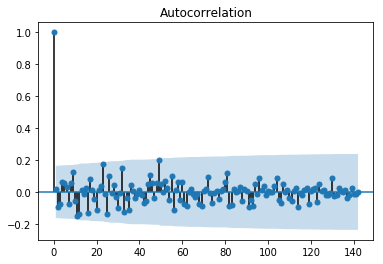

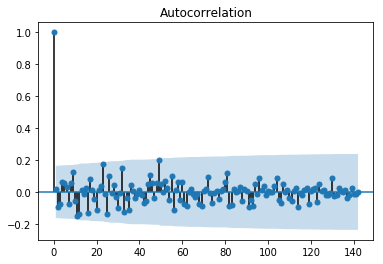

In [113]:
plot_acf(results_AR.resid)

In [114]:
# Taking it back to original scale

In [115]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009655
1949-03-01    0.018637
1949-04-01    0.027857
1949-05-01   -0.016054
1949-06-01   -0.012721
dtype: float64


In [116]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009655
1949-03-01    0.028292
1949-04-01    0.056149
1949-05-01    0.040095
1949-06-01    0.027374
dtype: float64


In [117]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/anastasiya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01         NaN
1949-02-01    0.009655
1949-03-01    0.028292
1949-04-01    0.056149
1949-05-01    0.040095
dtype: float64

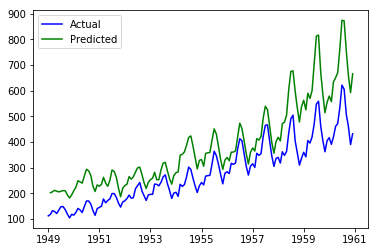

In [118]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)*200
plt.plot(data, color='blue')
plt.plot(predictions_ARIMA, color='green')
plt.legend(['Actual', 'Predicted'])

# HOMETASK 

1. build linera regression to find if there is correlation between 'sepal_length' and 'petal_length' flowers parameters from 'iris.csv'. Show some plots and descriptive statistics. Do t-test to see if their means are equal. Test if they are fro normal distribution 



2. build arima for predict shopmoo sales using 'sales-of-shampoo-over-a-three-ye.csv'



3. build linear correlation for sunny days and rainfals (use 'sunshine-duration-monthly-mean-daily-duration.csv' and 'rainfall-monthly-number-of-rain-days.csv' 


4. Do arima to predict rainfall



